# Day 1: Neural Network + MNIST Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape: (60000, 28, 28)


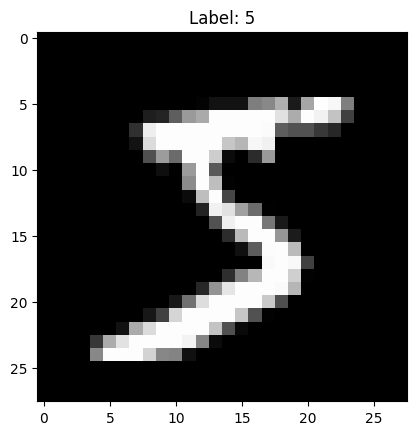

In [3]:
# Load the MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Shape:", X_train.shape)  # (60000, 28, 28)
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
#plt.savefig("sample_digit.png", dpi=300, bbox_inches='tight')
plt.show()


In [4]:
#  Normalize + One-Hot Encode

# Scale pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert target to one-hot vectors
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [5]:
# 4. Build a Simple MLP Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes (digits)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# train the model
history = model.fit(X_train, y_train_cat, epochs=10, validation_split=0.1, batch_size=128)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8128 - loss: 0.6688 - val_accuracy: 0.9603 - val_loss: 0.1421
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9545 - loss: 0.1583 - val_accuracy: 0.9658 - val_loss: 0.1117
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9677 - loss: 0.1060 - val_accuracy: 0.9688 - val_loss: 0.0976
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9756 - loss: 0.0763 - val_accuracy: 0.9745 - val_loss: 0.0772
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9828 - loss: 0.0585 - val_accuracy: 0.9762 - val_loss: 0.0827
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9868 - loss: 0.0455 - val_accuracy: 0.9790 - val_loss: 0.0716
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9898 - loss: 0.0357 - val_accuracy: 0.9768 - val_loss: 0.0785
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9909 - loss: 0.0303 - val_accuracy: 0

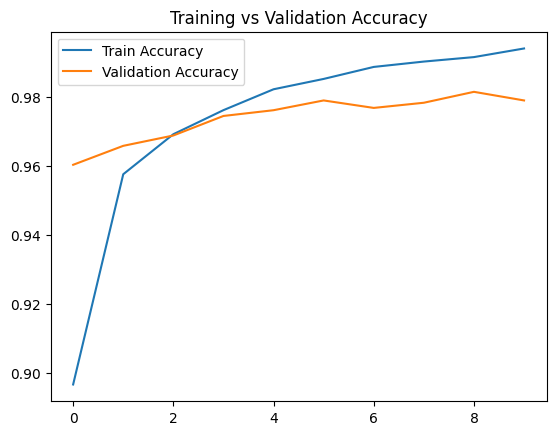

In [7]:
# visualization
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
#plt.savefig("Training vs Validation Accuracy.png", dpi=300, bbox_inches='tight')
plt.show()


In [8]:
# Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9741 - loss: 0.0931
Test Accuracy: 0.9760000109672546


In [9]:
# classification report
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.97      0.98      0.98       958
           7       0.95      0.99      0.97      1028
           8       0.98      0.95      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



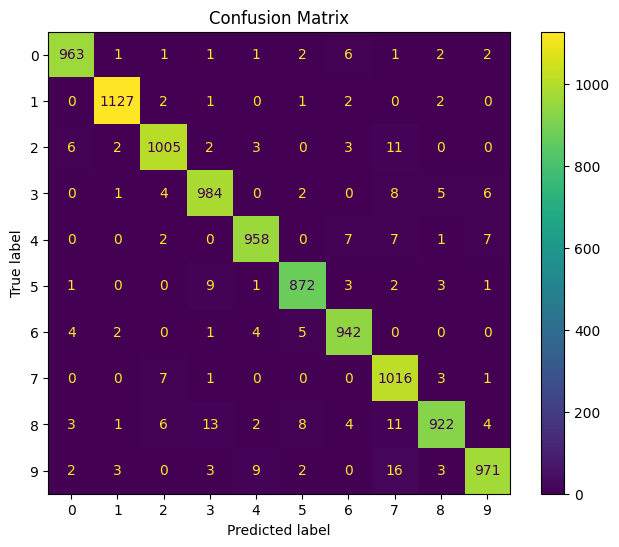

In [10]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot and save confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
#plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


In [11]:
# Save full model
#model.save("model.h5")

# To load it back:
##from tensorflow.keras.models import load_model
##model = load_model("my_model.h5")

#  Day 2: Build a CNN for Digit Recognition

In [1]:
# Import CNN Tools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
#Preprocess Data (for CNN input)   {Reshape for CNN input: (num_samples, 28, 28, 1)}
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

In [15]:
# Build CNN Architecture
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 digits
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
#Add EarlyStopping + ModelCheckpoint
callbacks = [EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint("models/cnn_best_model.h5", save_best_only=True)]

In [18]:
# train the model
history = cnn_model.fit(
    X_train_cnn, y_train_cat,
    validation_split=0.1,
    epochs=15,
    batch_size=128,
    callbacks=callbacks
)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7568 - loss: 0.7412

422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.7571 - loss: 0.7404 - val_accuracy: 0.9772 - val_loss: 0.0766
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9538 - loss: 0.1494

422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.9538 - loss: 0.1494 - val_accuracy: 0.9838 - val_loss: 0.0524
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9691 - loss: 0.1018

422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.9691 - loss: 0.1017 - val_accuracy: 0.9877 - val_loss: 0.0414
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9732 - loss: 0.0883

422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 65ms/step - accuracy: 0.9732 - loss: 0.0883 - val_accuracy: 0.9883 - val_loss: 0.0388
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9765 - loss: 0.0789

422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 65ms/step - accuracy: 0.9765 - loss: 0.0789 - val_accuracy: 0.9910 - val_loss: 0.0314
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9804 - loss: 0.0664 - val_accuracy: 0.9900 - val_loss: 0.0321
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9818 - loss: 0.0566

422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step - accuracy: 0.9818 - loss: 0.0566 - val_accuracy: 0.9925 - val_loss: 0.0297
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.9832 - loss: 0.0537 - val_accuracy: 0.9923 - val_loss: 0.0302
Epoch 9/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9845 - loss: 0.0506

422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 65ms/step - accuracy: 0.9845 - loss: 0.0506 - val_accuracy: 0.9915 - val_loss: 0.0289
Epoch 10/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9851 - loss: 0.0470

422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.9851 - loss: 0.0470 - val_accuracy: 0.9928 - val_loss: 0.0270
Epoch 11/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9861 - loss: 0.0433

422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9861 - loss: 0.0433 - val_accuracy: 0.9923 - val_loss: 0.0249
Epoch 12/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9868 - loss: 0.0421 - val_accuracy: 0.9918 - val_loss: 0.0298
Epoch 13/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 65ms/step - accuracy: 0.9872 - loss: 0.0408 - val_accuracy: 0.9937 - val_loss: 0.0263
Epoch 14/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9885 - loss: 0.0353 - val_accuracy: 0.9927 - val_loss: 0.0277


In [21]:
# Evaluate on Test Set
test_loss, test_acc = cnn_model.evaluate(X_test_cnn, y_test_cat)
print("CNN Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9908 - loss: 0.0295
CNN Test Accuracy: 0.9919000267982483


In [22]:
# Generate Classification Report
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_labels_cnn = np.argmax(y_pred_cnn, axis=1)

print(classification_report(y_test, y_pred_labels_cnn))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



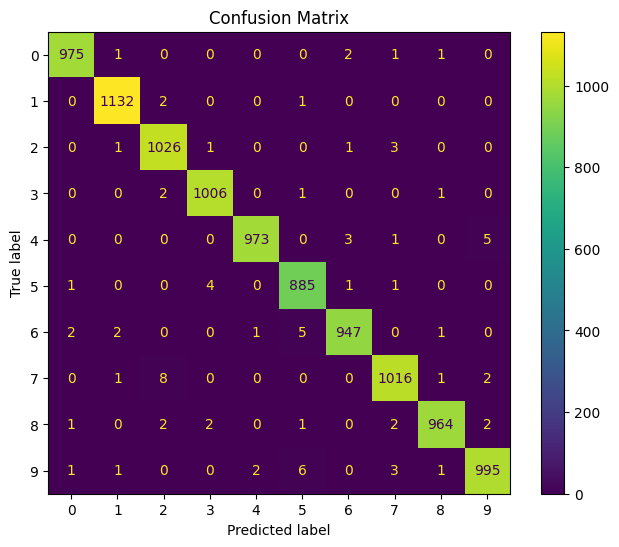

In [24]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_labels_cnn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot and save confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix(CNN).png", dpi=300, bbox_inches='tight')
plt.show()



Day 3: Compare MLP vs CNN + Visualize + Finalize

In [25]:
##  Compare Metrics: CNN vs MLP
# Assuming you already have y_pred_labels (MLP) and y_pred_labels_cnn (CNN)
from sklearn.metrics import accuracy_score, f1_score

print("MLP Accuracy:", accuracy_score(y_test, y_pred_labels))
print("CNN Accuracy:", accuracy_score(y_test, y_pred_labels_cnn))

print("MLP F1-Score:", f1_score(y_test, y_pred_labels, average='weighted'))
print("CNN F1-Score:", f1_score(y_test, y_pred_labels_cnn, average='weighted'))


MLP Accuracy: 0.976
CNN Accuracy: 0.9919
MLP F1-Score: 0.9759911328454646
CNN F1-Score: 0.9919003069004994


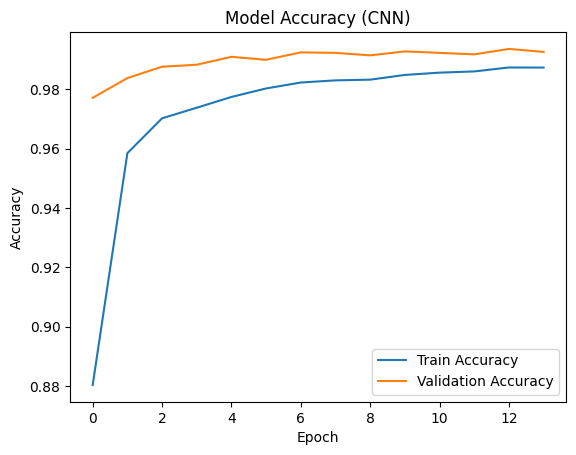

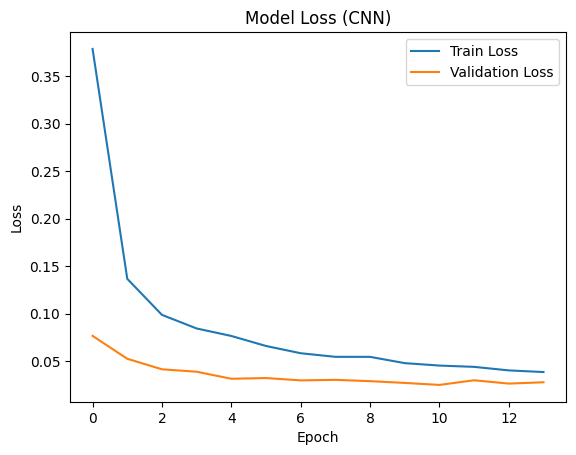

In [26]:
## Plot Accuracy and Loss
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (CNN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('cnn_accuracy.png')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (CNN)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('cnn_loss.png')
plt.show()


In [27]:
# Save Final Predictions (optinal)
# np.savetxt("models/cnn_predictions.txt", y_pred_labels_cnn, fmt='%d')

## 🔮 Future Improvements

- 🔁 Add **Data Augmentation** (rotation, shifting, zoom)
- 🧱 Train **deeper CNNs** (e.g., VGG-style architecture)
- 🌐 **Deploy model** via Streamlit or Flask web app
- 🔄 Try **Transfer Learning** using EfficientNet or MobileNet for similar image tasks

## Author
Hemant K  
📧 hemant777.karpe@gmail.com
🔗 [LinkedIn](https://www.linkedin.com/in/hemant-karpe)